In [21]:
import os
import fiona
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box, Polygon, mapping
import geopandas as gpd
import pandas as pd
from fiona.crs import from_epsg
import pycrs
import matplotlib.pyplot as plt
from descartes import PolygonPatch


import numpy as np
#import cartopy as cp

import random

import ipywidgets as widgets

In [2]:
badBox = widgets.Checkbox(
    value=False,
    description='Bad',
    disabled=False,
    indent=False
)
badBox

Checkbox(value=False, description='Bad', indent=False)

In [3]:
badBox.value

False

In [4]:
file = open("g_781.tif", "rb")
image = file.read()
bad781 = widgets.Image(
    value=image,
    format='png',
    width=200,
    height=200,
)

bad781
#badBox

Image(value=b'II*\x00\x08\x00\x00\x00\x11\x00\x00\x01\x03\x00\x01\x00\x00\x00\xe1\x00\x00\x00\x01\x01\x03\x00\…

In [38]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [39]:
# Add a new row at index position 2 with values provided in list
#df.iloc[2] = ['Smriti', 26, 'Bangalore', 'India']
	
# Add a new row at index position 2 with values provided in list
df.loc[3] = ['Smriti', 26]
df

,col1,col2
0,1,3
1,2,4
3,Smriti,26


In [5]:

from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    widgets.Checkbox(value=False, description='Bad'),
    widgets.Checkbox(value=False, description='Good'),
    Box([Label(value='# of Full Buildings'), IntSlider(min=0, max=10)], layout=form_item_layout),
    Box([Label(value='# of Partial Buildings'), IntSlider(min=0, max=10)], layout=form_item_layout),
    Box([Label(value='Egg style'),
         Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
    Box([Label(value='Ship size'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='Information'),
         Textarea()], layout=form_item_layout),
    Box([Label(value='Notes'),
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

Box(children=(Checkbox(value=False, description='Bad'), Checkbox(value=False, description='Good'), Box(childre…

In [54]:
object_fit = ['none', 'contain', 'fill', 'cover']
offset = '20px 10px'
image_value = ['g_781.tif']

boxes = []
for image, caption  in zip(image_value, ['600 x 300 image', ]):
    for fit in object_fit:
        ib = widgets.Image(value=image)
        ib.layout.object_position = offset
        ib.layout.margin = image_margin
        ib.layout.object_fit = fit
        # ib.layout.height = 'inherit'
        ib.layout.width = '100%'
        title = 'object_fit: {}'.format(ib.layout.object_fit)
        boxes.append(make_box_for_grid(ib, title))

vb = VBox()
h = HTML(value='<{size}><code>object_position</code> by '
               'offset {offset} with several '
               '<code>object_fit</code>s with large image</{size}>'.format(size=caption_size,
                                                         offset=offset))
vb.layout.align_items = 'center'
hb = HBox()
hb.layout = hbox_layout
hb.children = boxes

vb.children = [h, hb]
vb

TraitError: The 'value' trait of an Image instance must be a bytes object, but a value of 'g_781.tif' <class 'str'> was specified.

In [ ]:
# display same location at three time points
# only show rgb
# show

# click next
# close out photos
# serve up new photos
# display

# 

In [ ]:
#put shapefiles over top of photos

In [4]:
# Set filepath (fix path relative to yours)
fp = "C://Users//Scott/Documents/GithubRepositories/bmoreRoofGIS/Data/osmBuildingFootprints_for2014aerialphoto2.shp"

# Read file using gpd.read_file()
sandTownShapefiles = gpd.read_file(fp)
type(sandTownShapefiles)
sandTownShapefiles.head(2)

,osm_id,osm_way_id,name,type,aeroway,amenity,admin_leve,barrier,boundary,building,...,man_made,military,natural,office,place,shop,sport,tourism,other_tags,geometry
0,None,171582387,7-Eleven,None,None,None,None,None,None,yes,...,None,None,None,None,None,convenience,None,None,"""addr:city""=>""Baltimore"",""addr:country""=>""US"",...","POLYGON ((-76.66181 39.29275, -76.66181 39.292..."
1,None,177600512,Price Busters Discount Furniture,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,"""addr:city""=>""Baltimore"",""addr:country""=>""US"",...","POLYGON ((-76.65517 39.29328, -76.65514 39.292..."


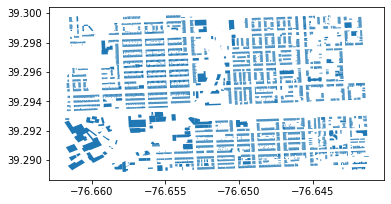

In [26]:
sandTownShapefiles.plot()

In [32]:
sandTownShapefiles.loc[2, 'other_tags']

In [16]:
sandTownShapefilesSubset = sandTownShapefiles[1:6]

In [6]:
print('crop extent crs: ', sandTownShapefiles.crs)

crop extent crs:  {'init': 'epsg:4326'}


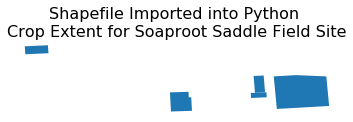

In [17]:
# plot the data
fig, ax = plt.subplots(figsize = (6, 6))
sandTownShapefilesSubset.plot(ax=ax)
ax.set_title("Shapefile Imported into Python \nCrop Extent for Soaproot Saddle Field Site", 
             fontsize = 16)
ax.set_axis_off();

In [31]:
sandTownShapefiles[0:1]

,osm_id,osm_way_id,name,type,aeroway,amenity,admin_leve,barrier,boundary,building,...,man_made,military,natural,office,place,shop,sport,tourism,other_tags,geometry
0,None,171582387,7-Eleven,None,None,None,None,None,None,yes,...,None,None,None,None,None,convenience,None,None,"""addr:city""=>""Baltimore"",""addr:country""=>""US"",...","POLYGON ((-76.66181 39.29275, -76.66181 39.292..."


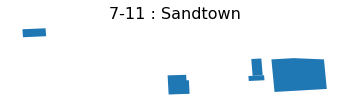

In [18]:
# plot the data
fig, ax = plt.subplots(figsize = (6, 6))
sandTownShapefilesSubset.plot(ax=ax)
ax.set_title("7-11 : Sandtown", 
             fontsize = 16)
ax.set_axis_off();

In [22]:
sandTownShapefilesSubset.loc[0, 'geometry']

KeyError: 0

In [1]:
fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(lidar_chm_im,
              cmap='terrain',
              extent=extent,
              ax=ax,
              cbar=False)
crop_extent_soap.plot(ax=ax, alpha=.6, color='g');

NameError: name 'plt' is not defined

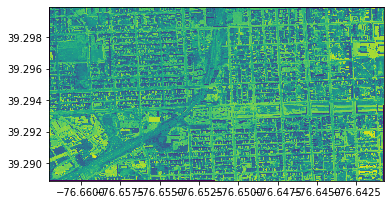

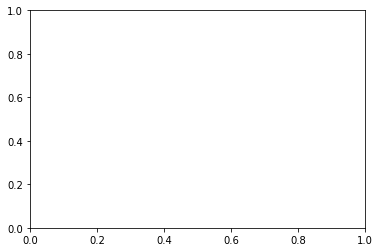

In [33]:
import fiona
import rasterio
import rasterio.plot
import matplotlib as mpl
from descartes import PolygonPatch

fp = r"201402_baltimore_city_md_6in_sp_cnir/vol001/45098103wgs84.tif"

os.chdir('C://Users/Scott/Desktop/trainingData/trainingDataAllSand/Data/')

src = rasterio.open(fp)

with fiona.open("C://Users//Scott/Documents/GithubRepositories/bmoreRoofGIS/Data/osmBuildingFootprints_for2014aerialphoto2.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]

rasterio.plot.show((src, 1))
ax = mpl.pyplot.gca()

patches = [PolygonPatch(feature, edgecolor="red", facecolor="none", linewidth=2) for feature in features]
ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))

In [ ]:
src.crs